In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report


In [3]:
# Load Dataset
data_path = r"C:\Users\prana\OneDrive\Documents\6th Sem\ML Lab\unclean_pet_data.csv"
data = pd.read_csv(data_path)

# Display Dataset Overview
print("Dataset Overview:")
print(data.head())

Dataset Overview:
  PetType    Breed  AgeMonths    Size   WeightKg  TimeInShelterDays  \
0  Rabbit   Rabbit      116.0  Medium  29.186575               71.0   
1     Cat  Siamese      165.0  Medium  25.265161               52.0   
2     Cat  Siamese        NaN   Small        NaN                NaN   
3  Rabbit   Rabbit       31.0   Large   6.641891               52.0   
4  Rabbit   Rabbit      125.0   Large  13.845579               39.0   

   AdoptionLikelihood  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  


In [4]:
# Replace non-numeric placeholders like 'x' with NaN
data = data.apply(pd.to_numeric, errors='coerce')

data.fillna(data.mean(numeric_only=True), inplace=True)

# Check for missing values
print("\nMissing Values After Imputation:")
print(data.isnull().sum())



Missing Values After Imputation:
PetType               561
Breed                 561
AgeMonths               0
Size                  561
WeightKg                0
TimeInShelterDays       0
AdoptionLikelihood      0
dtype: int64


In [5]:
# Encode Categorical Variables
le = LabelEncoder()
categorical_cols = data.select_dtypes(include=['object']).columns

for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

# Display the cleaned dataset
print("\nCleaned Dataset:")
print(data.head())



Cleaned Dataset:
   PetType  Breed   AgeMonths  Size   WeightKg  TimeInShelterDays  \
0      NaN    NaN  116.000000   NaN  29.186575          71.000000   
1      NaN    NaN  165.000000   NaN  25.265161          52.000000   
2      NaN    NaN   92.918812   NaN  16.425149          43.071287   
3      NaN    NaN   31.000000   NaN   6.641891          52.000000   
4      NaN    NaN  125.000000   NaN  13.845579          39.000000   

   AdoptionLikelihood  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  


In [6]:
# Define Features and Target
X = data.drop('AdoptionLikelihood', axis=1)  # Adjust 'AdoptionLikelihood' to your target column name
y = data['AdoptionLikelihood']

# Scale Features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Confirm shape of features and target
print("\nShape of Features (X):", X.shape)
print("Shape of Target (y):", y.shape)



Shape of Features (X): (561, 6)
Shape of Target (y): (561,)


C:\Users\prana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\prana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\prana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


C:\Users\prana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_base.py:635: UserWarning: Skipping features without any observed values: ['PetType' 'Breed' 'Size']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


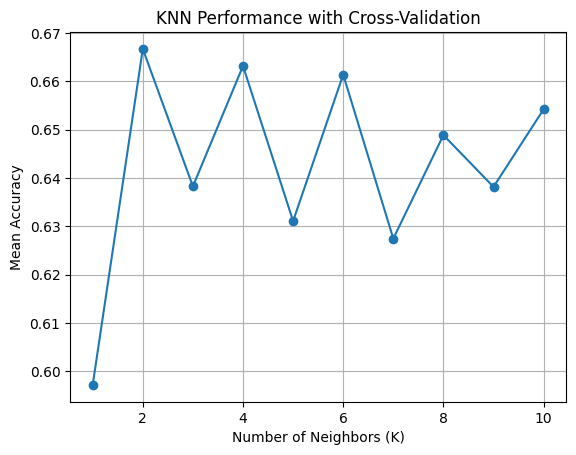

In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Define Features (X) and Target (y)
X = data.drop('AdoptionLikelihood', axis=1)  # Adjust target column name as needed
y = data['AdoptionLikelihood']

# Handle Missing Values in Features
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Standardize Features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Perform KNN and Cross-Validation
k_values = range(1, 11)  # K values from 1 to 10
mean_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')  # 5-fold cross-validation
    mean_accuracies.append(scores.mean())

# Plot Performance
import matplotlib.pyplot as plt
plt.plot(k_values, mean_accuracies, marker='o')
plt.title("KNN Performance with Cross-Validation")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Mean Accuracy")
plt.grid()
plt.show()


In [8]:
# Find Optimal K
optimal_k = k_values[np.argmax(mean_accuracies)]
print(f"Optimal K: {optimal_k}")
print(f"Highest Accuracy: {max(mean_accuracies):.4f}")

# Train Model with Optimal K
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X, y)  # Fit the model on the entire dataset (or use train-test split for validation)

# Predict and Evaluate
y_pred = knn.predict(X)

# Display Classification Report
print("\nClassification Report:")
print(classification_report(y, y_pred))


Optimal K: 2
Highest Accuracy: 0.6667

Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86       374
           1       1.00      0.33      0.50       187

    accuracy                           0.78       561
   macro avg       0.87      0.67      0.68       561
weighted avg       0.83      0.78      0.74       561



In [9]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# Ensure categorical columns are correctly selected and are of type 'object'
categorical_columns = data.select_dtypes(include=['object']).columns

# If categorical columns exist, proceed with imputation and one-hot encoding
if len(categorical_columns) > 0:
    # Handle missing values for categorical columns (impute with the most frequent value)
    categorical_imputer = SimpleImputer(strategy='most_frequent')
    data[categorical_columns] = categorical_imputer.fit_transform(data[categorical_columns])

    # One-Hot Encoding for categorical columns to make them numeric
    one_hot_encoder = OneHotEncoder(sparse_output=False)
    encoded_data = pd.DataFrame(one_hot_encoder.fit_transform(data[categorical_columns]),
                                columns=one_hot_encoder.get_feature_names_out(categorical_columns))

    # Concatenate the encoded data with the original dataset (excluding original categorical columns)
    data = pd.concat([data, encoded_data], axis=1)

    # Drop the original categorical columns after encoding
    data.drop(columns=categorical_columns, inplace=True)

# Display the final transformed dataset
print(data.head())


   PetType  Breed   AgeMonths  Size   WeightKg  TimeInShelterDays  \
0      NaN    NaN  116.000000   NaN  29.186575          71.000000   
1      NaN    NaN  165.000000   NaN  25.265161          52.000000   
2      NaN    NaN   92.918812   NaN  16.425149          43.071287   
3      NaN    NaN   31.000000   NaN   6.641891          52.000000   
4      NaN    NaN  125.000000   NaN  13.845579          39.000000   

   AdoptionLikelihood  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  


In [10]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Ensure categorical columns are correctly selected and are of type 'object'
categorical_columns = data.select_dtypes(include=['object']).columns

# If categorical columns exist, proceed with imputation and label encoding
if len(categorical_columns) > 0:
    # Handle missing values for categorical columns (impute with the most frequent value)
    categorical_imputer = SimpleImputer(strategy='most_frequent')
    data[categorical_columns] = categorical_imputer.fit_transform(data[categorical_columns])

    # Label Encoding for categorical columns to make them numeric
    label_encoder = LabelEncoder()
    
    # Apply label encoding to each categorical column
    for column in categorical_columns:
        data[column] = label_encoder.fit_transform(data[column])

# Display the final transformed dataset
print(data.head())


   PetType  Breed   AgeMonths  Size   WeightKg  TimeInShelterDays  \
0      NaN    NaN  116.000000   NaN  29.186575          71.000000   
1      NaN    NaN  165.000000   NaN  25.265161          52.000000   
2      NaN    NaN   92.918812   NaN  16.425149          43.071287   
3      NaN    NaN   31.000000   NaN   6.641891          52.000000   
4      NaN    NaN  125.000000   NaN  13.845579          39.000000   

   AdoptionLikelihood  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  
